In [1]:
# Install required libraries
!pip install pandas numpy catboost scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 11.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [3]:
# Load the data
data = pd.read_csv('IBM2017.csv')

In [4]:
# Ensure the 'Date' column is in datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [5]:
# Prepare the time series data
y = data['Close']  # Target: closing price

In [6]:
# Create lagged features
def create_lagged_features(series, lags=5):
    df = pd.DataFrame(series)
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['Close'].shift(lag)
    return df.dropna()

lags = 5
data_lagged = create_lagged_features(y, lags)

In [7]:
# Split the data into features and target
X = data_lagged.drop('Close', axis=1)
y = data_lagged['Close']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [9]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Initialize CatBoost model
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=100)

In [12]:
# Train the model
model.fit(X_train_scaled, y_train)

0:	learn: 0.3201808	total: 48.1ms	remaining: 48s
100:	learn: 0.0353675	total: 187ms	remaining: 1.66s
200:	learn: 0.0275546	total: 324ms	remaining: 1.29s
300:	learn: 0.0227845	total: 459ms	remaining: 1.06s
400:	learn: 0.0196576	total: 597ms	remaining: 892ms
500:	learn: 0.0173501	total: 736ms	remaining: 733ms
600:	learn: 0.0151817	total: 889ms	remaining: 590ms
700:	learn: 0.0133834	total: 1.03s	remaining: 439ms
800:	learn: 0.0118052	total: 1.17s	remaining: 290ms
900:	learn: 0.0104293	total: 1.31s	remaining: 144ms
999:	learn: 0.0092632	total: 1.44s	remaining: 0us


In [13]:
# Predict on test data
y_pred = model.predict(X_test_scaled)

In [14]:
# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.022215980624531957


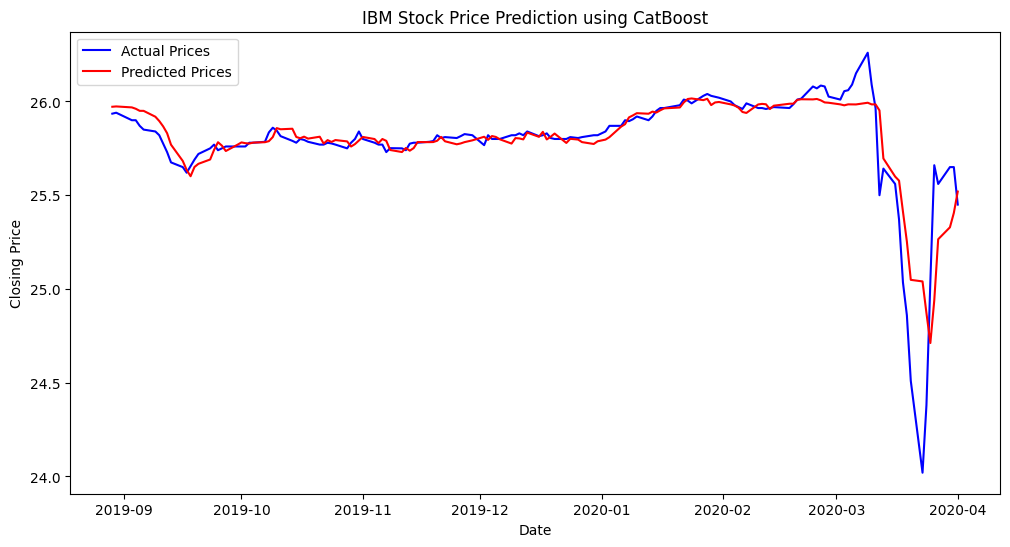

In [15]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('IBM Stock Price Prediction using CatBoost')
plt.legend()
plt.show()

Explanation of the Script:

    Install Required Libraries:
        Install pandas, numpy, catboost, scikit-learn, and matplotlib.

    Load the Data:
        Read the IBM stock data from IBM2017.csv.

    Prepare the Time Series Data:
        Use the Close column as the target variable.

    Create Lagged Features:
        Generate lagged features to help the model use past information for predictions.

    Split the Data:
        Split the data into training and testing sets.

    Normalize the Features:
        Normalize the features using StandardScaler for better model performance.

    Initialize and Train the CatBoost Model (a gradient boosting algorithm):
        Initialize the CatBoost model with specified hyperparameters and train it on the training data.

    Predict on Test Data:
        Use the trained model to predict the closing prices on the test set.

    Evaluate Performance:
        Calculate the Mean Squared Error (MSE) to evaluate the model's performance.

    Plot Results:
        Visualize the actual versus predicted closing prices.

Notes:

    Ensure the file path 'IBM2017.csv' is correct.
    The hyperparameters of the CatBoost model (iterations, learning rate, depth) can be adjusted for better performance.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6ccbe74-5722-4f84-8e54-7da9a834c88a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>